In [ ]:
import numpy as np



> Блок с отступами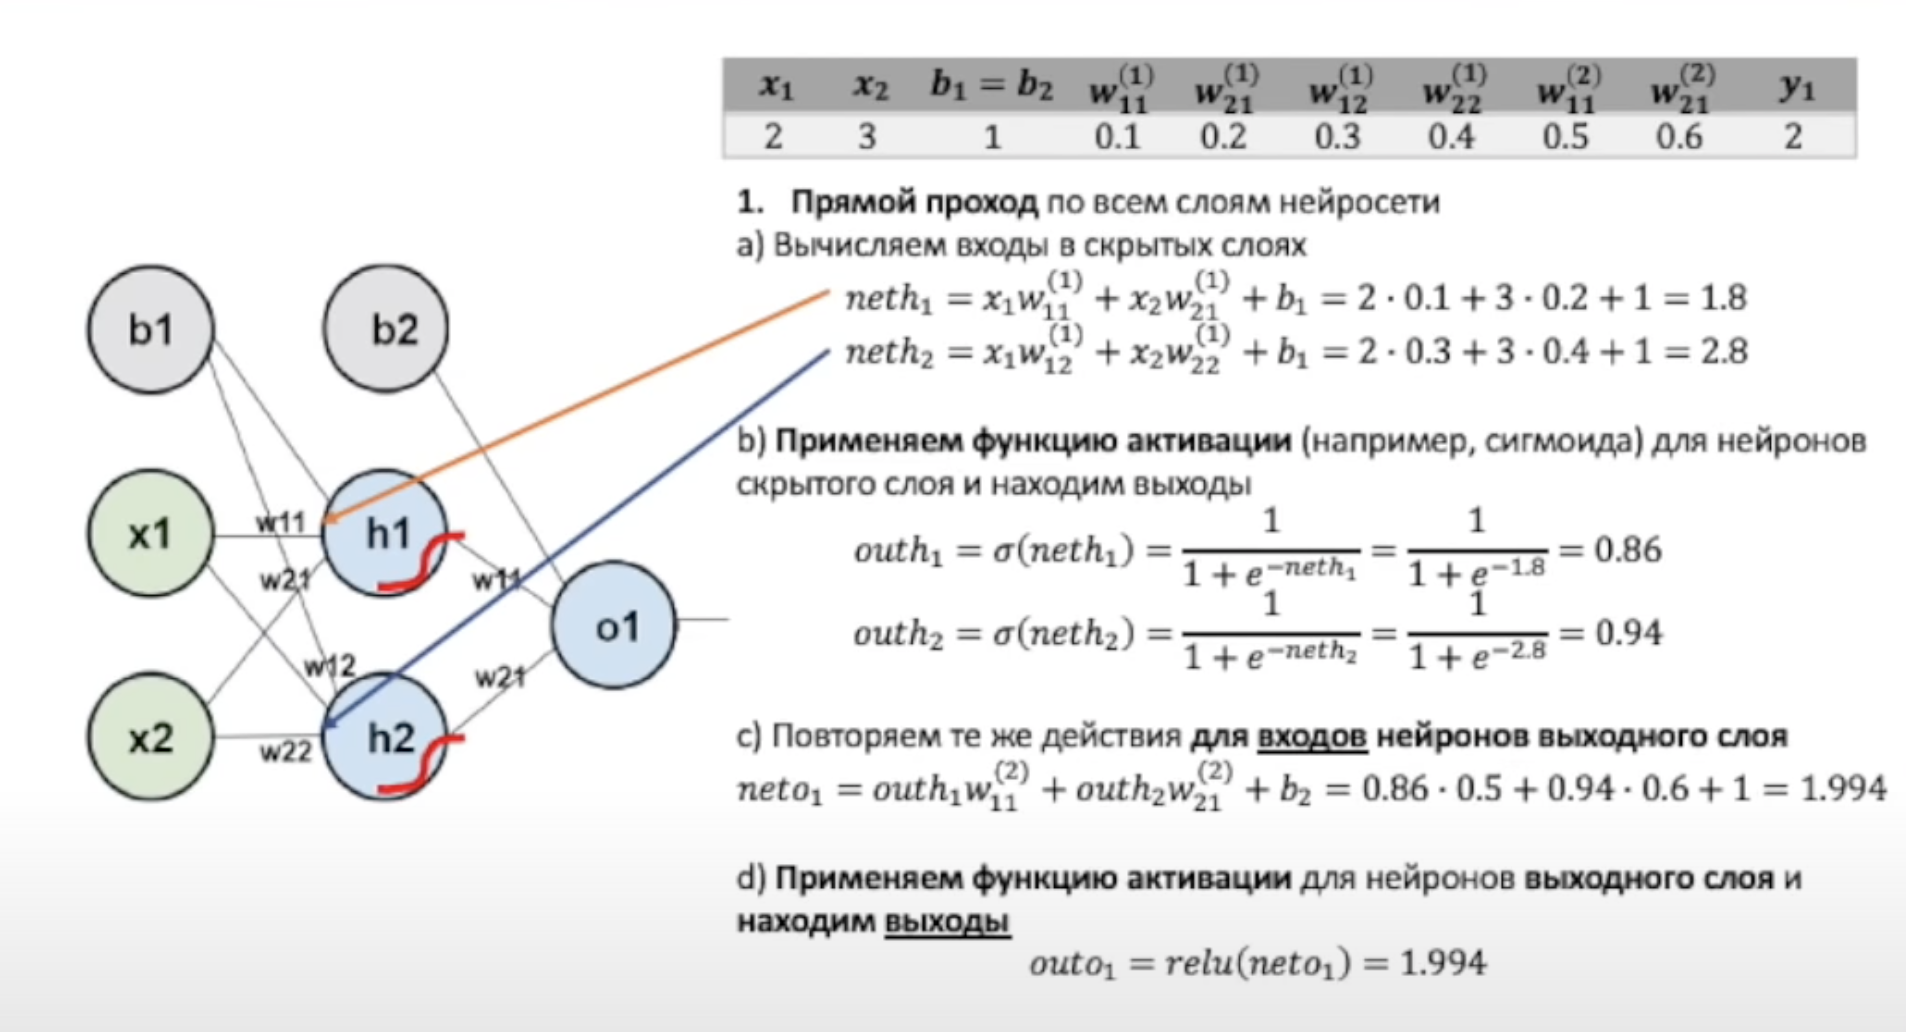



# Моделирование

In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        # вектор признаков X
        self.input = x
        # смещение b1
        self.b1 = 1
        # смещение b2
        self.b2 = 1
        # вектор весов
        self.weights1 = np.array([[0.1, 0.3],
                                  [0.2, 0.4]])

        self.weights2 = np.array([[0.5],
                                  [0.6]])
        self.y = y
        self.output = np.zeros(self.y.shape)
            
    # Сигмоида
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    # ReLU
    def relu(self, x):
        return x * (x > 0)

    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1)+self.b1)
        self.output = self.relu(np.dot(self.layer1, self.weights2)+self.b2)

In [ ]:
X = np.array([2, 3])

y = np.array([2])

In [ ]:
np.array([[0.1,0.3],[0.2,0.4]])

array([[0.1, 0.3],
       [0.2, 0.4]])

In [ ]:
np.dot(X, np.array([[0.1,0.3],
                    [0.2,0.4]]))+1

array([1.8, 2.8])

In [ ]:
nn = NeuralNetwork(x=X, y=y)
nn.feedforward()

print(f"layer1 = {nn.layer1}\n")
  
# Ответ на обновленных весах
print(f"Output = {nn.output}")

# Ошибка
print(f"Error = {1/len(X)*(y - nn.output)**2}")

layer1 = [0.85814894 0.94267582]

Output = [1.99467996]
Error = [1.41514021e-05]


In [ ]:
class NeuralNetwork:
    def __init__(self, x, y, learning_rate):
        # вектор признаков X
        self.input = x
        # смещение b1
        self.b1 = 1
        # смещение b2
        self.b2 = 1
        # вектор весов
        self.weights1 = np.array([[0.1, 0.3],
                                  [0.2, 0.4]])

        self.weights2 = np.array([[0.5],
                                  [0.6]])
        self.y = y
        self.output = np.zeros(self.y.shape)
        # скорость обучения
        self.learning_rate = learning_rate
        
        
    # Сигмоида
    def sigmoid(self, x):
        return 1.0/(1 + np.exp(-x))
    
    
    # Производная сигмоиды
    def sigmoid_derivative(self, x):
        return x * (1.0 - x)
    
    
    # ReLU
    def relu(self, x):
        return x * (x > 0)
    
    
    # производная ReLU
    def relu_derivative(self, x):
        return (x >= 0).astype(float)
    
    
    # Функция потерь
    def loss(self, y, output):
        return 1/2*(y - output)**2

    
    # Производная функции потерь
    def loss_derivative(self, y, output):
        return y - output 

    
    # Прямое распространение ошибки
    def feedforward(self):
        self.layer1 = self.sigmoid(np.dot(self.input, self.weights1)+self.b1)
        self.output = self.relu(np.dot(self.layer1, self.weights2)+self.b2)
        self.error = self.loss(self.y, self.output)

        
    # Обратное распространение ошибки
    def backpropagation(self):
        """
        ВЫХОДНОЙ СЛОЙ - предварительное вычисление
        Вычисляем первую часть для w11(w21) -> ((target_o1 - outo_1)∙outo_1∙(1-outo_1)) 
        """
        Q_w2 = self.learning_rate * \
               self.loss_derivative(self.y, self.output) * \
               self.relu_derivative(self.output)

        """
        ВЫХОДНОЙ СЛОЙ
        Есть массив первичных вычислений Q_w2: 
        для w11_2 -> Q_w2∙outh_1
        для w21_2 -> Q_w2∙outh_2
        Получаем массив -> [w11, w21]
        """        
        dQ_dw2 = Q_w2 * self.layer1.reshape(-1,1)
        

        """
        СКРЫТЫЙ СЛОЙ - предварительное вычисление
        Для w11(w21) -> (target_o1-outo_1)∙relu'∙w_11_2∙outh_1∙(1-outh_1)*input_1
        Для w12(w22) -> (target_o1-outo_1)∙relu'∙w_21_2∙outh_2∙(1-outh_2)*input_2
        """
        

        dQ_dw1_1 = self.learning_rate * \
                   (self.loss_derivative(self.y, self.output) * \
                   self.relu_derivative(self.output)) @ \
                   self.weights2.T * \
                   self.sigmoid_derivative(self.layer1) 
        
            
        dQ_dw1 = np.matrix(dQ_dw1_1).T @ np.matrix(self.input)

        
        # Обновляем веса
        self.weights1 += dQ_dw1
        self.weights2 += dQ_dw2

In [ ]:
nn = NeuralNetwork(x=X, y=y, learning_rate=0.1)

In [ ]:
for i in range(2):
    nn.feedforward()
    nn.backpropagation()
    print(f'-------------------EPOCH {i}-------------------')
    print(f"weight_1 =\n {nn.weights1}\n")
    print(f"weight_2 =\n {nn.weights2}\n")
    
    print(f"hidden layer = {nn.layer1}\n")
    
    # Ответ на обновленных весах
    print(f"Output {i} = {nn.output}")
    print(f"Error_{i} = {nn.error}\n")

-------------------EPOCH 0-------------------
weight_1 =
 [[0.10006476 0.30009714]
 [0.2000345  0.40005175]]

weight_2 =
 [[0.50045654]
 [0.60050151]]

hidden layer = [0.85814894 0.94267582]

Output 0 = [1.99467996]
Error_0 = [1.41514021e-05]

-------------------EPOCH 1-------------------
weight_1 =
 [[0.10011873 0.30017809]
 [0.20006324 0.40009486]]

weight_2 =
 [[0.50083671]
 [0.60091912]]

hidden layer = [0.8581773  0.94269471]

Output 1 = [1.99557003]
Error_1 = [9.81230333e-06]

